In [15]:
%matplotlib inline
from matplotlib import pyplot as plt

In [16]:
import numpy as np

In [17]:
# each point is length, width, type (0,1)
data = [[3, 1.5, 1],
        [2, 1, 0],
        [4, 1.5, 1],
        [3, 1, 0],
        [3.5, 0.5, 1],
        [2, 0.5, 0],
        [5.5, 1, 1],
        [1, 1, 0]]

mystery_circle = [4.5, 1]

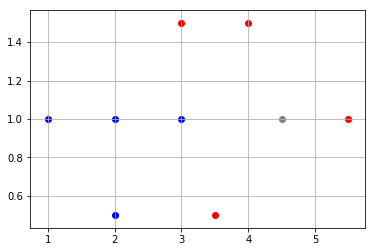

In [18]:
# network
#    o circle type
#   / \ w1, w2, b
#  o   o length, width

# scatter plot them
def vis_data():
    plt.grid()

    for i in range(len(data)):
        c = 'r'
        if data[i][2] == 0:
            c = 'b'
        plt.scatter([data[i][0]], [data[i][1]], c=c)

    plt.scatter([mystery_circle[0]], [mystery_circle[1]], c='gray')

vis_data()

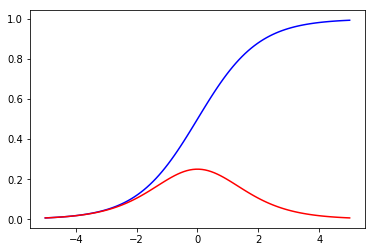

In [19]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1 - sigmoid(x))


X = np.linspace(-5, 5, 100)

plt.plot(X, sigmoid(X), c="b") # sigmoid in blue
fig = plt.plot(X, sigmoid_p(X), c="r") # sigmoid_p in red

In [20]:
T = np.linspace(-5, 5, 10)

In [21]:
T

array([-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
        0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ])

In [22]:
Y = sigmoid(T)

In [23]:
Y

array([0.00669285, 0.02005754, 0.0585369 , 0.1588691 , 0.36457644,
       0.63542356, 0.8411309 , 0.9414631 , 0.97994246, 0.99330715])

In [24]:
# training loop

iterations = 10000
learning_rate = 0.2
costs = [] # keep costs during training, see if they go down

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

for i in range(1, 50000):
    ri = np.random.randint(len(data))
    point = data[ri]

    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    
    target = point[2]
    cost = np.square(pred - target)
#   print(point, cost)

    dcost_pred = 2 * (pred - target)
    dpred_dz = sigmoid_p(z)
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1
    
    dcost_dz = dcost_pred * dpred_dz
    
    dcost_dw1 = dcost_pred * dpred_dz * dz_dw1
    dcost_dw2 = dcost_pred * dpred_dz * dz_dw2
    dcost_db = dcost_dz * dz_db
    
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db
    

In [25]:
# scatter data

for i in range(len(data)):
    point = data[i]
    print(point)
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    print(pred)

[3, 1.5, 1]
3.717000118899999e-05
[2, 1, 0]
0.0008550540240002822
[4, 1.5, 1]
2.5499316274846913e-06
[3, 1, 0]
5.8703026069991316e-05
[3.5, 0.5, 1]
2.4283605382126723e-05
[2, 0.5, 0]
0.0013497574629309913
[5.5, 1, 1]
7.235828511092682e-08
[1, 1, 0]
0.012321392198034317


In [26]:
z = mystery_circle[0] * w1 + mystery_circle[1] * w2 + b
pred = sigmoid(z)
pred

1.0547922102469912e-06

In [27]:
def which_circle(length, width):
    z = length * w1 + width * w2 + b
    pred = sigmoid(z)
    if pred < .5:
        print("circle is blue")
    else:
        print("circle is red")

In [28]:
which_circle(4, 2)

circle is blue
